## Z-Score Detection
1. **In z-score all the values above 3 and all the values below -3 are outliers**
## Fomula
**`Z-Score=x-mean()/std()`**
## Assumption
1. **There is only one assumption it can apply only normally distrubuted columm ans it will give best result.**
## Handling Outlier
1. **Two method we can use.**
   1. `Capping`
       1. **In capping we can apply the limmit all the above 3 and all the values below -3 are outliers.**
   2. `Trimming`
       1. **In Trimming we can simply remove those values.**

# Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [75]:
df=pd.read_csv('StudentsPerformance.csv')
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [54]:
df.shape

(1000, 8)

In [55]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: xlabel='math score', ylabel='Density'>

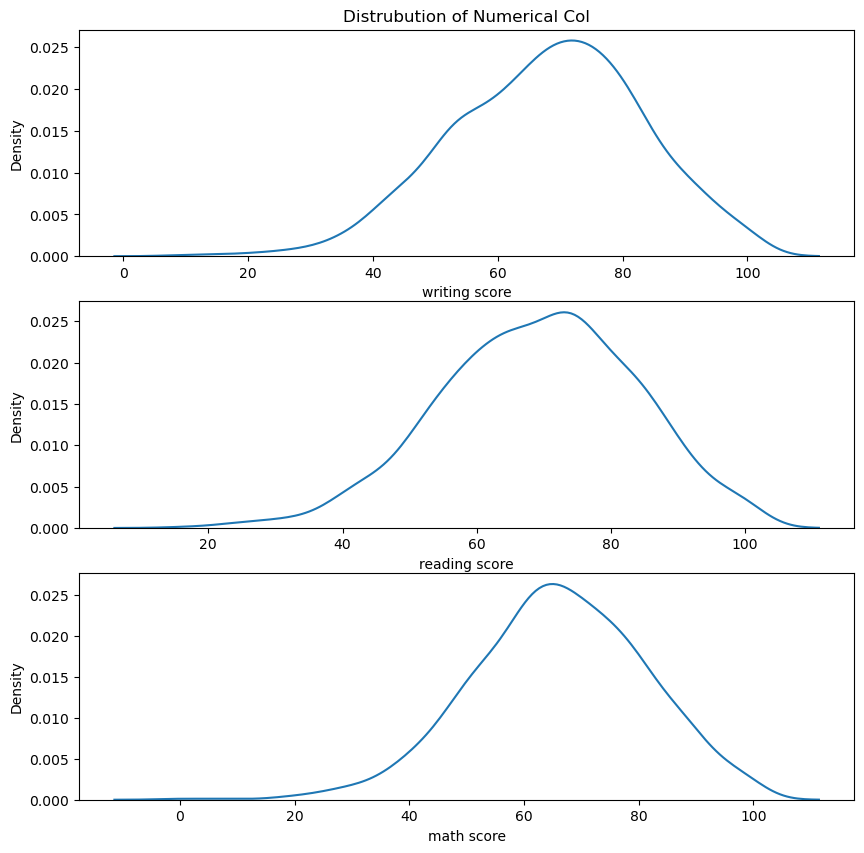

In [57]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,10))
ax1.set_title("Distrubution of Numerical Col")
sns.kdeplot(df['writing score'],ax=ax1)

ax1.set_title("Distrubution of Numerical Col")
sns.kdeplot(df['reading score'],ax=ax2)

ax1.set_title("Distrubution of Numerical Col")
sns.kdeplot(df['math score'],ax=ax3)


# Conclussion
1. **See that all the column that are present in this data should be almost normally distrubuted now we can apply `z-score`**
2. **Calculate the `z-score` only for one columns.**

In [58]:
df['writing z-score']=(df['writing score']-df['writing score'].mean())/(df['writing score'].std())

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing z-score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.391296
1,female,group C,some college,standard,completed,69,90,88,1.312612
2,female,group B,master's degree,standard,none,90,95,93,1.641653
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.582952
4,male,group C,some college,standard,none,76,78,75,0.457104


**Now we have a `z-score` now detect the outlier and the handle them.**

In [60]:
df[(df['writing z-score']>3)|(df['writing z-score']<-3)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing z-score
59,female,group C,some high school,free/reduced,none,0,17,10,-3.820434
76,male,group E,some high school,standard,none,30,26,22,-3.030734
327,male,group A,some college,free/reduced,none,28,23,19,-3.228159
596,male,group B,high school,free/reduced,none,30,24,15,-3.491392


**These are the outliers**

# Trimming

In [61]:
new_df=df[~((df['writing z-score']>3)|(df['writing z-score']<-3))]

In [62]:
new_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing z-score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.391296
1,female,group C,some college,standard,completed,69,90,88,1.312612
2,female,group B,master's degree,standard,none,90,95,93,1.641653
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.582952
4,male,group C,some college,standard,none,76,78,75,0.457104


**In trimming we can simply remove the outliers.**

# Capping
1. **In capping we can found the upper and lower bound**
    1. `upper bound=mean + 3*std`
    2. `lower bound=mean - 3*std`

In [63]:
upper_bound=df['writing score'].mean()+3*df['writing score'].std()
lower_bound=df['writing score'].mean()-3*df['writing score'].std()
print("Upper bound: ",upper_bound,'Lower Bound: ',lower_bound)

Upper bound:  113.64097103260893 Lower Bound:  22.467028967391073


In [64]:
df['writing score']=np.where(df['writing score']>upper_bound,
         upper_bound,
         np.where(df['writing score']<lower_bound,
         lower_bound,df['writing score']
        ))

# Now check result

In [65]:
df['writing score'].describe()

count    1000.000000
mean       68.077868
std        15.116397
min        22.467029
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

<Axes: ylabel='Density'>

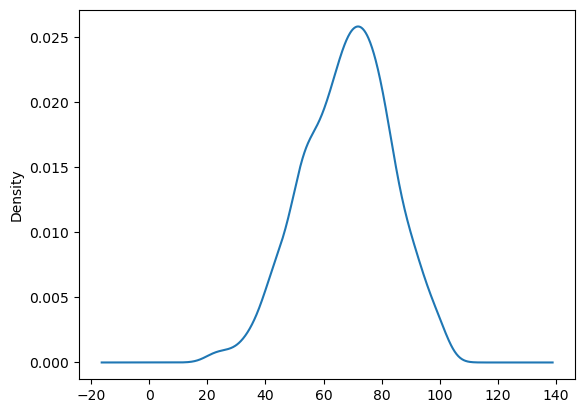

In [66]:
df['writing score'].plot(kind='kde')

# Custom Class

In [86]:
class z_score:
    def __init__(self):
        self.mean=None
        self.std=None
    
    def fit(self,x_train):
        try:
            self.mean=x_train.mean()
            self.std=x_train.std()
        except:
            raise ValueError("Only numerical columns are supported.")
    
    def transform(self,x_train):
        return (x_train-self.mean)/(self.std)
    
    def fit_transform(self,x_train):
        self.fit(x_train)
        return (x_train-self.mean)/(self.std)
    

In [87]:
z=z_score()

# Transform

In [92]:
transform=z.fit_transform(df.select_dtypes('number'))
transform

,math score,reading score,writing score
0,0.389828,0.193902,0.391296
1,0.191979,1.426762,1.312612
2,1.576922,1.769223,1.641653
3,-1.258913,-0.833482,-1.582952
4,0.653627,0.604855,0.457104
...,...,...,...
995,1.445023,2.043192,1.773270
996,-0.269668,-0.970467,-0.859061
997,-0.467517,0.125409,-0.200978
998,0.126030,0.604855,0.588721


# Original

In [90]:
df.select_dtypes('number')

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77
